# Redshift Distributions Parametric Sweep


This notebook plots the redshift distributions for the parametric sweep of the luminosity function (LF) parameters.
It showcases the impact of the values of LF parameters onto the resulting redshift distribution constructed using the convolution method explained in the paper. 
The redshift distributions are plotted for each of the 5 luminosity function parameters, with 5 distributions plotted on each subplot (LF values are varied). 
The distributions are plotted with a gradient color scheme, where the color of the distribution corresponds to the value of the luminosity function parameter.
 The peak of each distribution is indicated with a dashed line connecting the peak to the x-axis. 
 The redshift value of the peak is displayed in the legend of each distribution.
 The redshift distributions are saved in the file `redshift_distributions.npy`, and the corresponding luminosity function parameters are saved in the file `lf_params_list.npy`.
  The redshift range for the distributions is saved in the file `redshift_range.npy`. 
  The plots are saved in the `plots_output/parametric_sweeps` directory as `lf_parametric_sweep_dndz.pdf` and `lf_parametric_sweep_dndz.png`.

In [1]:
import processing.helpers as h
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filepath = "jmas_data/parametric_sweeps/redshift_distribution/"
redshift_distributions = np.load(f"{filepath}redshift_distributions.npy", allow_pickle=True)
lf_params_list = np.load(f"{filepath}lf_params_list.npy", allow_pickle=True)
redshift_range = np.arange(0.01, 3.5+0.01, 0.01)
mycolors = h.mycolors

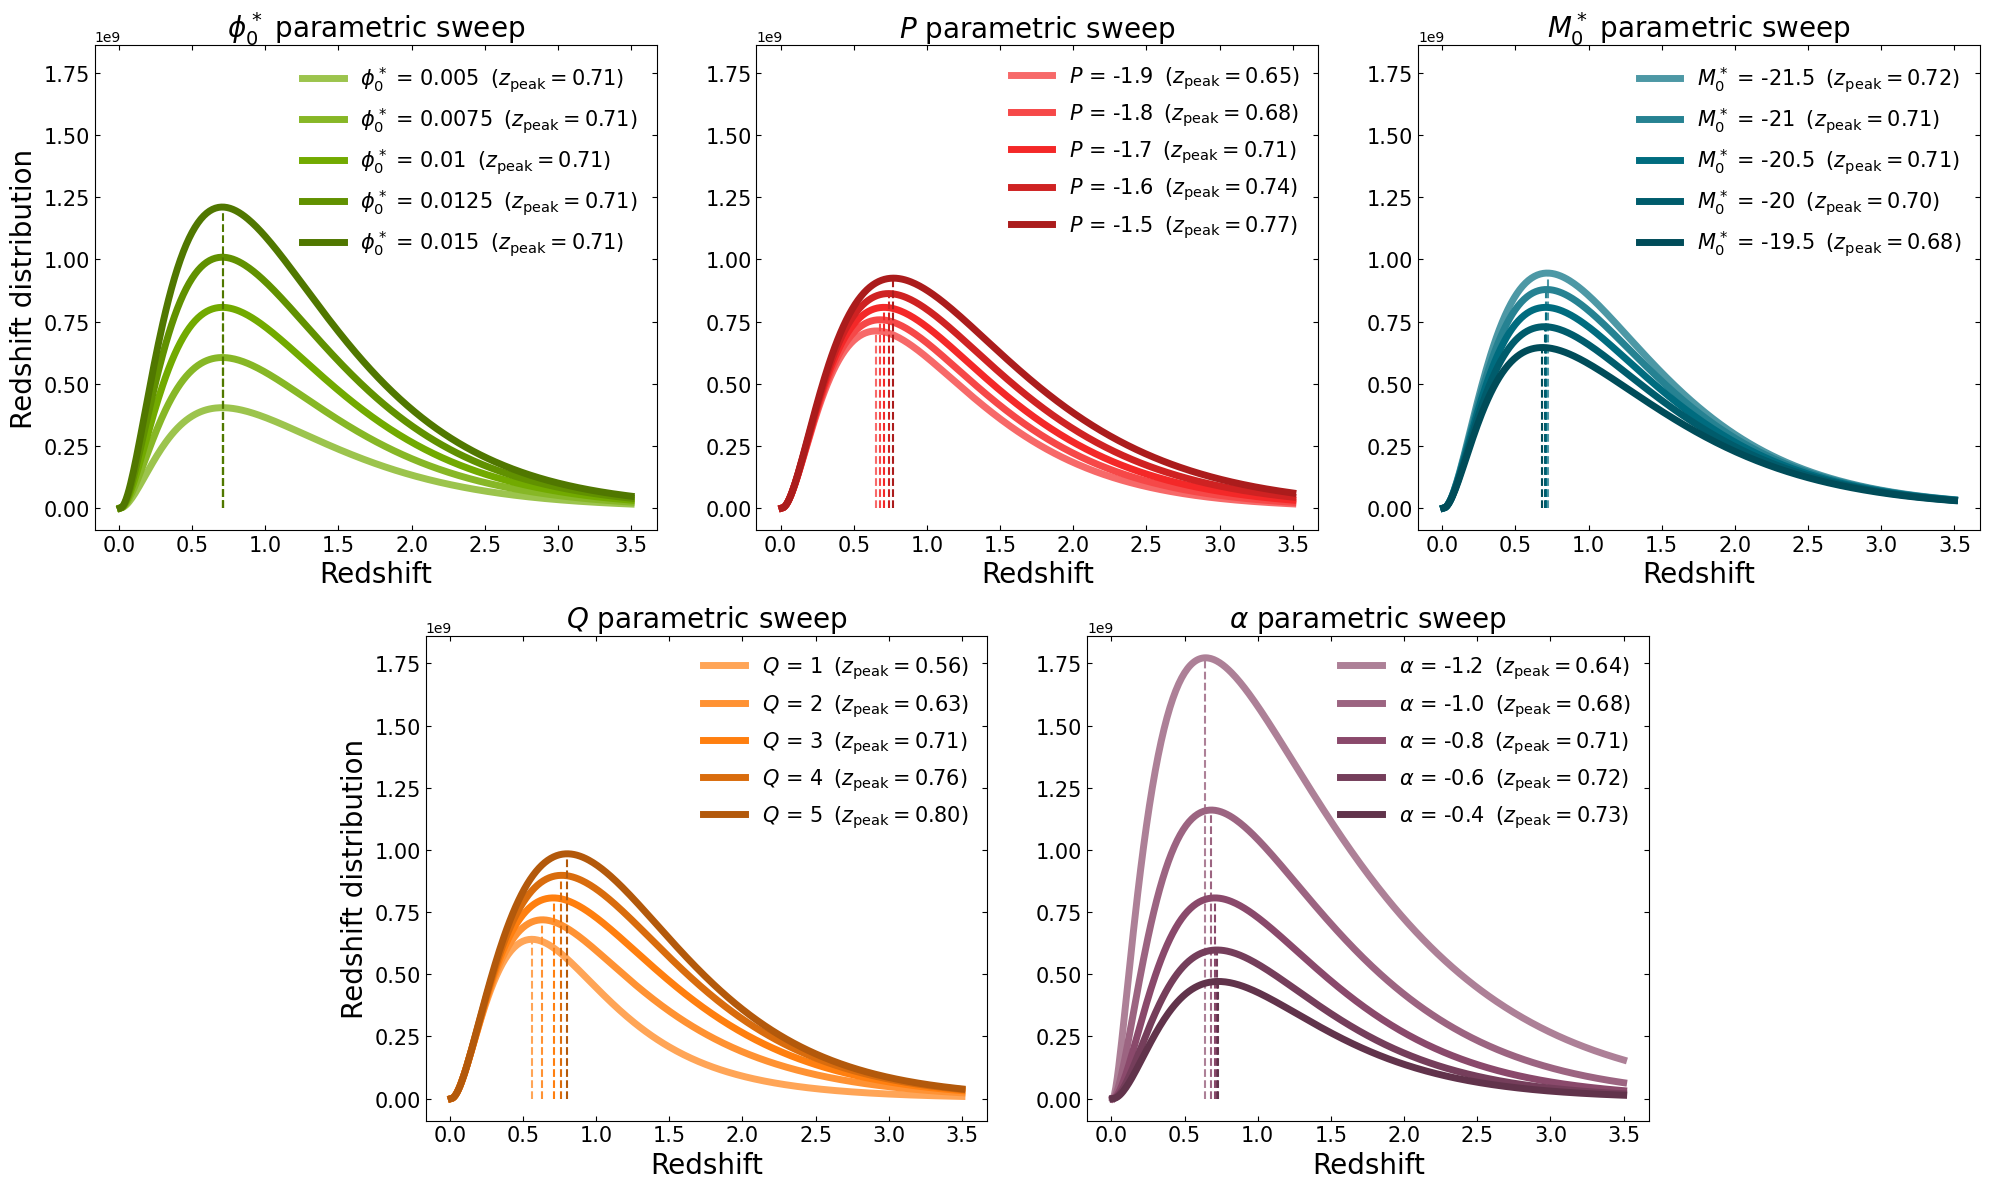

In [3]:
# The redshift_distributions is a list containing the 25 distributions
# redshift_range contains the common x-axis values for all distributions

# Create the specified subplot layout
fig = plt.figure(figsize=(20, 12))
ax1 = plt.subplot2grid(shape=(2, 6), loc=(0, 0), colspan=2)
ax2 = plt.subplot2grid((2, 6), (0, 2), colspan=2, sharey=ax1)
ax3 = plt.subplot2grid((2, 6), (0, 4), colspan=2, sharey=ax1)
ax4 = plt.subplot2grid((2, 6), (1, 1), colspan=2, sharey=ax1)
ax5 = plt.subplot2grid((2, 6), (1, 3), colspan=2, sharey=ax1)

param_labels = ["$\phi_0^*$", "$P$", "$M_0^*$", "$Q$", "$\\alpha$"]
axes = [ax1, ax2, ax3, ax4, ax5]
lw = 5

# Loop through each subplot and plot 5 distributions on each
for i, ax in enumerate(axes):
    start_idx = i * 5
    end_idx = start_idx + 5
    distributions_to_plot = redshift_distributions[start_idx:end_idx]

    # Loop through distributions and plot with gradient color
    for idx, distribution in enumerate(distributions_to_plot):
        color_idx = i * 5 + idx
        lf_params = lf_params_list[start_idx + idx]

        # Extract the specific lfparam value for this plot
        lfparam_value = lf_params["phi_0_star"] if i == 0 else \
                        lf_params["p"] if i == 1 else \
                        lf_params["m_0_star"] if i == 2 else \
                        lf_params["q"] if i == 3 else \
                        lf_params["alpha"]
            
        params = f"{param_labels[i]} = {lfparam_value} "
        zpeak = f"$ \:(z_{{\\rm{{peak}}}}={redshift_range[np.argmax(distribution)]:.2f})$"
        
        ax.plot(redshift_range, distribution, label=params+zpeak, lw=lw, color=mycolors[color_idx])

        # Find the index of the peak in the distribution
        peak_index = np.argmax(distribution)

        # Get the corresponding redshift value for the peak
        peak_redshift = redshift_range[peak_index]

        # Get the corresponding peak probability value
        peak_prob = distribution[peak_index]

        # Plot a dashed line connecting the peak to the x-axis
        ax.plot([peak_redshift, peak_redshift], [0, peak_prob], color=mycolors[color_idx], linestyle='--')

    ax.set_title(f"{param_labels[i]} parametric sweep", fontsize=20)
    ax.set_xlabel("Redshift", fontsize=20) 
    if i in [0, 3]:  # Display y-label only for ax1 and ax4
        ax.set_ylabel("Redshift distribution", fontsize=20) 
    ax.tick_params(direction='in', axis='both', which='major', labelsize=15, top=True, right=True)
    ax.legend(frameon=False, fontsize=15)
    
# Adjust horizontal spacing between subplots
plt.subplots_adjust(wspace=0.23)
plt.tight_layout()

plot_path = "plots_output/parametric_sweeps/"
plt.savefig(f"{plot_path}lf_parametric_sweep_dndz.pdf", bbox_inches="tight")
plt.savefig(f"{plot_path}lf_parametric_sweep_dndz.png", bbox_inches="tight", dpi=300)
